In [1]:
import gc
import os
import numpy as np 
import pandas as pd 
import utils.paths as plh
import utils.read_utils as hlpread
from src.models.feature_eng.TE_KFold import KFoldTargetEncoder
from src.models.feature_eng.FreqEncoding import FrequencyEncoding
from src.models.feature_eng.Combine_feature import CombineFeatures
from src.models.feature_eng.KFoldFreqEncoding import KFoldFrequencyEncoding
from src.models.feature_eng.CountVectorizerEncoding import CountVectorizerEncoding
from src.models.feature_eng.TFIDFVectorizerEncoding import TFIDFVectorizerEncoding

In [2]:
PROJECT_ROOT = plh.get_project_root()

train_data = os.path.join(PROJECT_ROOT, 
                          hlpread.read_yaml_key('data_source.data_folders'),
                          hlpread.read_yaml_key('data_source.prepared.folder'),
                          hlpread.read_yaml_key('data_source.prepared.clean_train'),
                        )
train = hlpread.read_from_parquet(train_data)

print(train.shape)

print(train.columns)
#col_use = [x for x in train.columns if not x in ['ROLE_TITLE', 'MGR_ID']]
#train = train[col_use]
#targetcol = 'ACTION'

#te_col = list(train.columns)
#te_col.remove(targetcol)

(30391, 10)
Index(['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE'],
      dtype='object')


In [ ]:
from sklearn.pipeline import Pipeline

#Order of the pipeline matter as this impact the output
feature_engg = Pipeline( steps = [
                                ('combine_feature', CombineFeatures()),

                                #('KFoldTE', KFoldTargetEncoder()),

                                #('frequency_encoding', FrequencyEncoding(min_group_size = 2)),

                                #('tfidf_vectorizer_encoding', TFIDFVectorizerEncoding()),

                                ('count_vectorizer_encoding', CountVectorizerEncoding()),
                                ]
                              ,verbose =  True
                        ) 

X = feature_engg.fit_transform(train) 

X.shape

## Visualize the output of Count Vectorizer Encoding ##

In [3]:
cnt_obj = CountVectorizerEncoding()
X = cnt_obj.fit_transform(train) 

In [4]:
from sklearn.preprocessing import StandardScaler
std_obj = StandardScaler()

freq_enc_cols = [x for x in X.columns if ('FreqEnc'.lower() in x.lower()) | ('cv'.lower() in x.lower())]
X_2 = std_obj.fit_transform(X[freq_enc_cols])
X_2 = pd.DataFrame(X_2, columns = freq_enc_cols)
X_2['ACTION'] = train['ACTION']

,RESOURCE_ROLE_ROLLUP_1_svd_cv_0,RESOURCE_ROLE_ROLLUP_1_svd_cv_1,ROLE_ROLLUP_1_RESOURCE_svd_cv_0,ROLE_ROLLUP_1_RESOURCE_svd_cv_1,ROLE_ROLLUP_1_ROLE_ROLLUP_2_svd_cv_0,ROLE_ROLLUP_1_ROLE_ROLLUP_2_svd_cv_1,ROLE_ROLLUP_1_ROLE_FAMILY_DESC_svd_cv_0,ROLE_ROLLUP_1_ROLE_FAMILY_DESC_svd_cv_1,ROLE_ROLLUP_1_ROLE_FAMILY_svd_cv_0,ROLE_ROLLUP_1_ROLE_FAMILY_svd_cv_1,...,ROLE_FAMILY_DESC_ROLE_CODE_svd_cv_0,ROLE_FAMILY_DESC_ROLE_CODE_svd_cv_1,ROLE_FAMILY_ROLE_ROLLUP_1_svd_cv_0,ROLE_FAMILY_ROLE_ROLLUP_1_svd_cv_1,ROLE_FAMILY_ROLE_FAMILY_DESC_svd_cv_0,ROLE_FAMILY_ROLE_FAMILY_DESC_svd_cv_1,ROLE_CODE_ROLE_ROLLUP_1_svd_cv_0,ROLE_CODE_ROLE_ROLLUP_1_svd_cv_1,ROLE_CODE_ROLE_FAMILY_DESC_svd_cv_0,ROLE_CODE_ROLE_FAMILY_DESC_svd_cv_1
0,-0.437773,-0.064912,0.709201,-0.217584,0.709237,-0.151057,0.709160,-0.260694,0.709178,-0.351979,...,1.980157,-0.158228,1.408707,-0.493533,1.419710,-0.222536,1.205181,-0.316871,1.353772,-0.201496
1,-0.437773,-0.064912,0.709201,-0.217584,0.709237,-0.151057,0.709160,-0.260694,0.709178,-0.351979,...,1.980157,-0.158228,1.408707,-0.493533,1.419710,-0.222536,1.205181,-0.316871,1.353772,-0.201496
2,-0.249971,-0.105590,0.709201,-0.217584,0.709237,-0.151057,0.709160,-0.260694,0.709178,-0.351979,...,1.980157,-0.158228,1.408707,-0.493533,1.419710,-0.222536,1.205181,-0.316871,1.353772,-0.201496
3,1.882256,-0.465886,0.709201,-0.217584,0.709237,-0.151057,0.709160,-0.260694,0.709178,-0.351979,...,1.980157,-0.158228,1.408707,-0.493533,1.419710,-0.222536,1.205181,-0.316871,1.353772,-0.201496
4,1.882256,-0.465886,0.709201,-0.217584,0.709237,-0.151057,0.709160,-0.260694,0.709178,-0.351979,...,1.980157,-0.158228,1.408707,-0.493533,1.419710,-0.222536,1.205181,-0.316871,1.353772,-0.201496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30386,0.989465,8.674954,-1.386610,1.875279,-1.409967,6.620006,-1.327839,-0.422341,-1.346487,-0.679222,...,-0.526422,-0.157314,-0.862500,-0.320104,-0.704928,-0.222431,-0.724798,-0.305956,-0.595271,-0.191251
30387,-0.383495,0.042094,-1.386610,1.875279,-1.409967,6.620006,-1.327839,-0.422341,-1.346487,-0.679222,...,-0.526422,-0.157314,-0.862500,-0.320104,-0.704928,-0.222431,-0.724798,-0.305956,-0.595271,-0.191251
30388,0.989465,8.674954,-1.386610,1.875279,-1.409967,6.620006,-1.327839,-0.422341,-1.346487,-0.679222,...,-0.526425,-0.157316,-0.862500,-0.320104,-0.704928,-0.222431,-0.724798,-0.305956,-0.595271,-0.191251
30389,0.989465,8.674954,-1.386610,1.875279,-1.409967,6.620006,-1.327839,-0.422341,-1.346487,-0.679222,...,-0.526425,-0.157316,-0.862500,-0.320104,-0.704928,-0.222431,-0.724798,-0.305956,-0.595271,-0.191251


In [38]:
col = list(X_2.columns[:10])
col.append('ACTION')

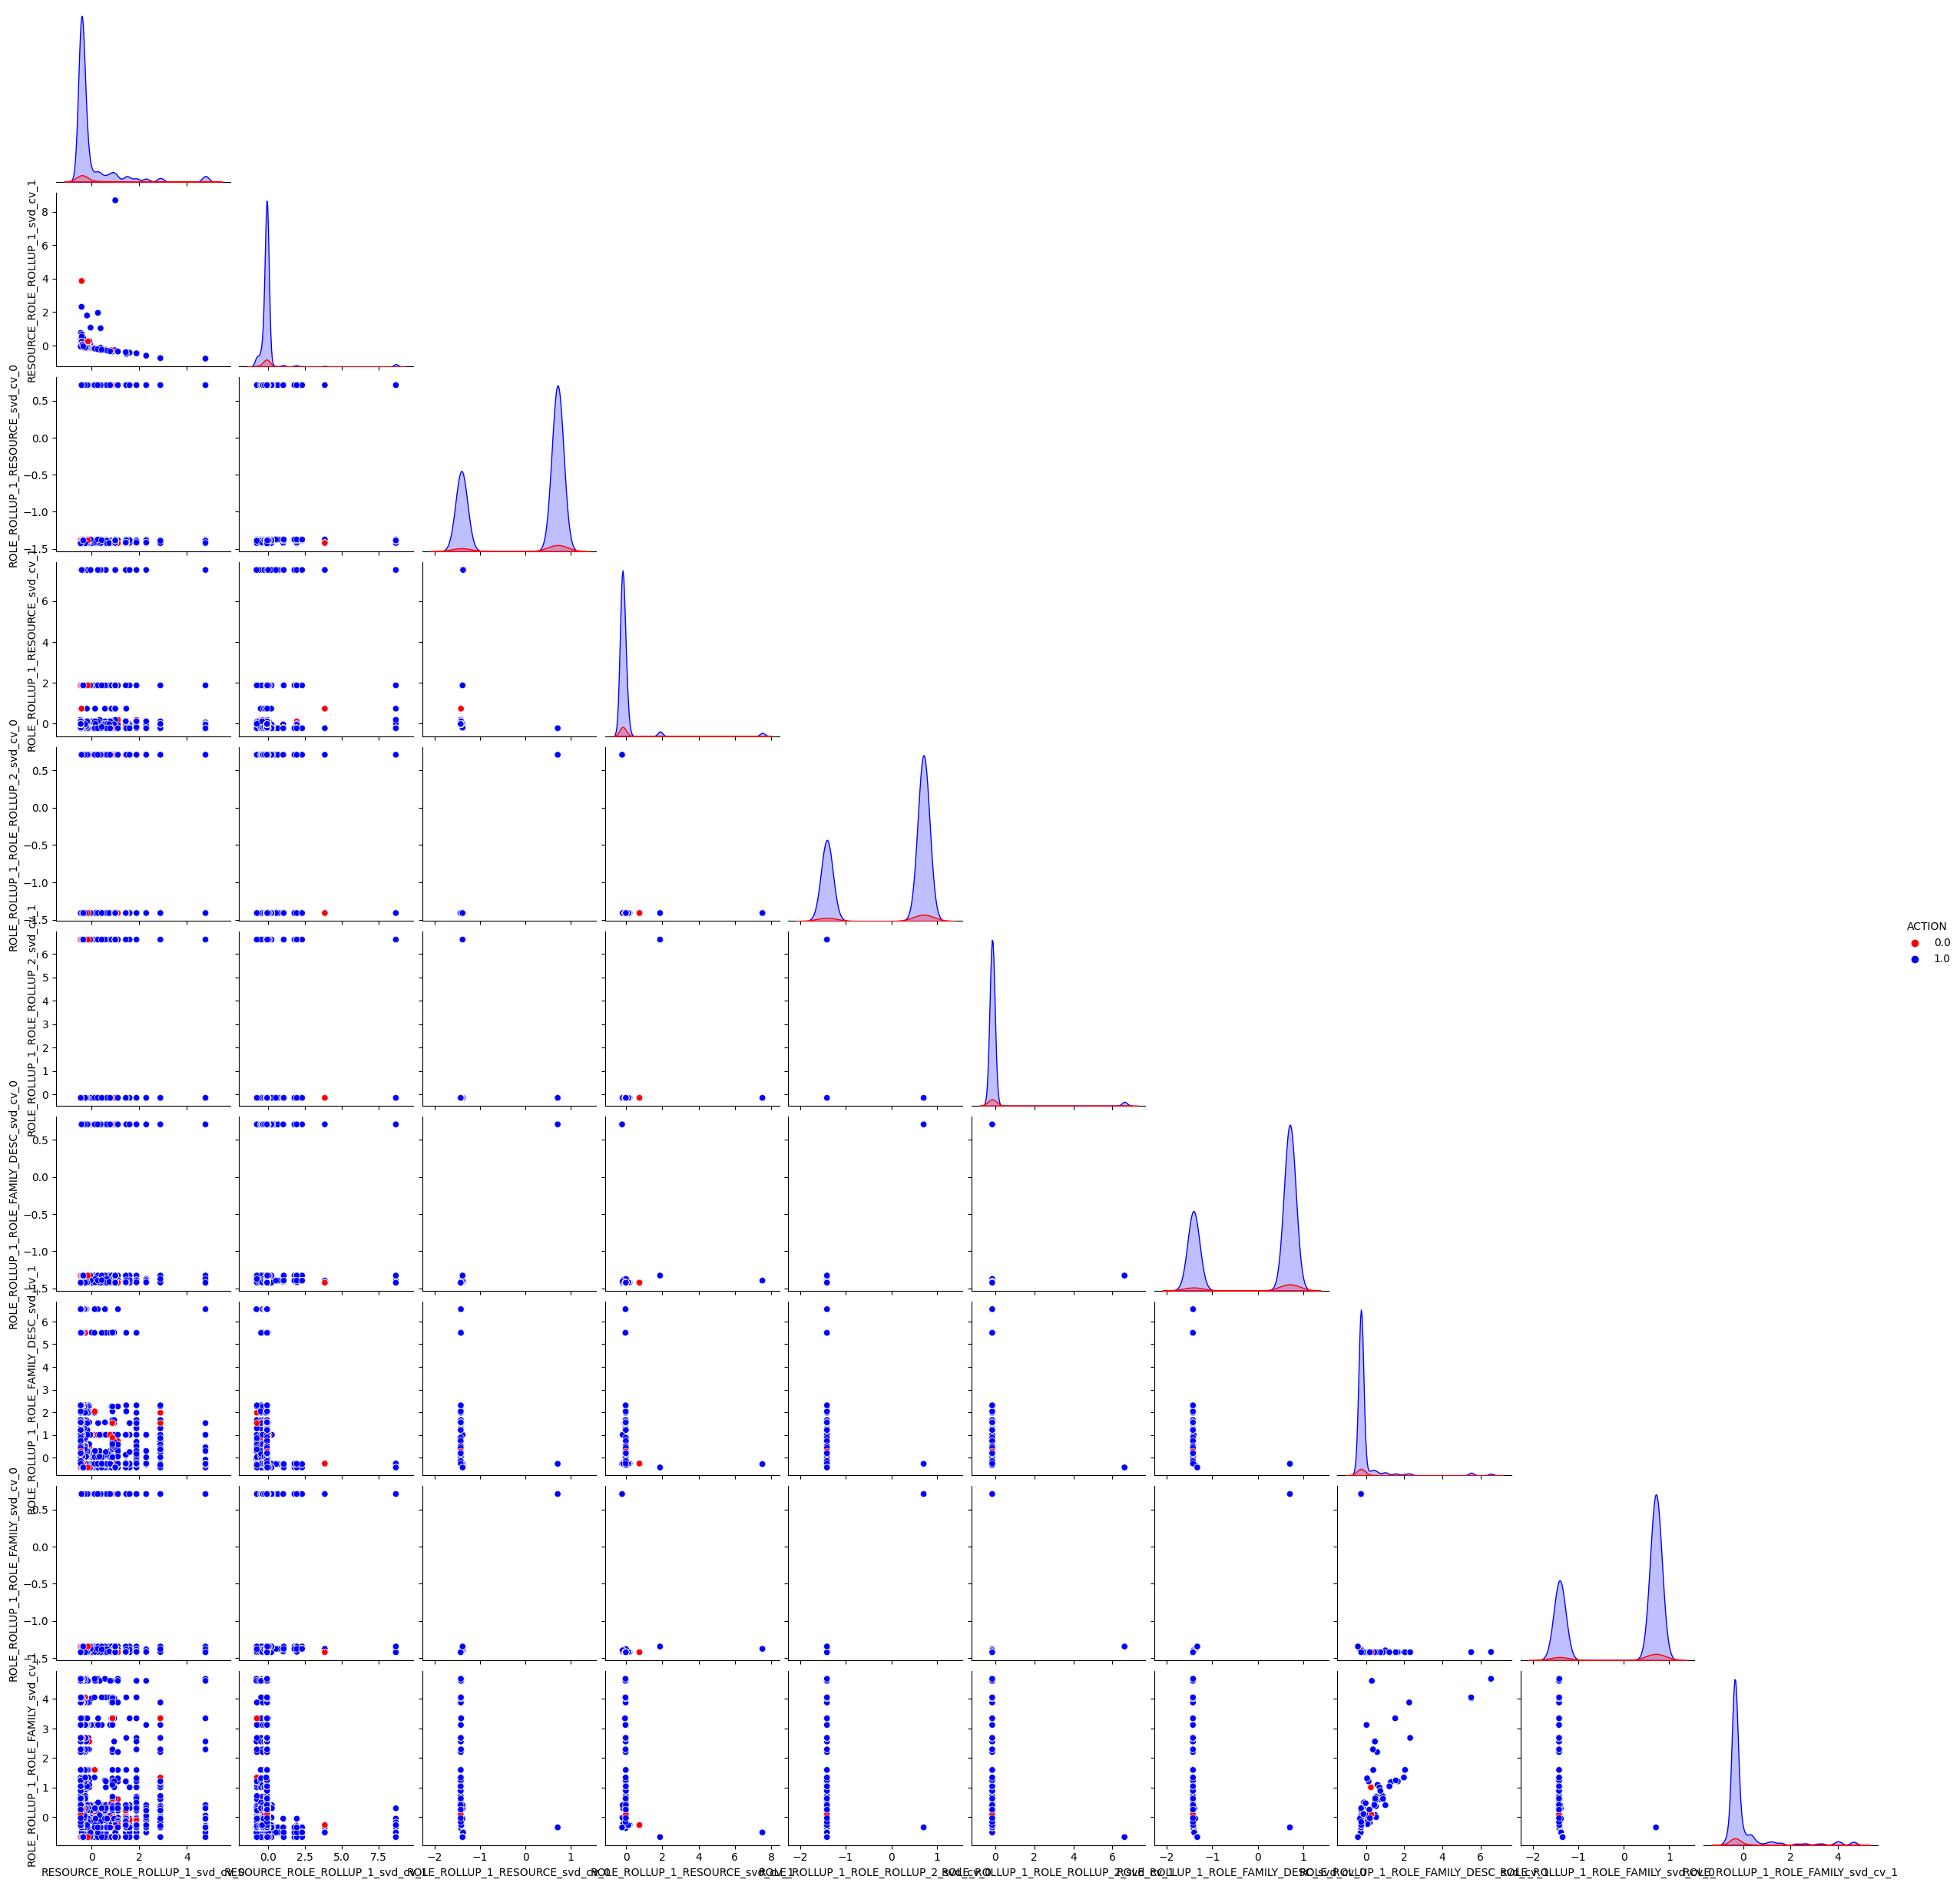

In [41]:
import seaborn as sns
sns.pairplot(X_2[col], hue = 'ACTION', corner=True, palette=['red','blue'])

## Observartion: ##
Negative do not form cluster there close to +ve sample. So to conside for Knn it will be difficault to find the k which is able to classify ans k-nn is pron to imbalance data set.

# Temp #

In [ ]:
from sklearn.pipeline import Pipeline

#Order of the pipeline matter as this impact the output
feature_engg = Pipeline( steps = [
                                ('combine_feature', CombineFeatures()),

                                ('KFoldTE', KFoldTargetEncoder()),

                                ('frequency_encoding', FrequencyEncoding(min_group_size = 2))])
X = feature_engg.fit_transform(train)

In [ ]:
X.shape

In [ ]:
X.reset_index(drop = True, inplace = True)

In [ ]:
cnt_vector = hlpread.read_from_parquet( os.path.join(PROJECT_ROOT, 
                hlpread.read_yaml_key('data_source.data_folders'),
                hlpread.read_yaml_key('featurize.count_vector.output.folder'),
                hlpread.read_yaml_key('featurize.count_vector.output.filename'),
))
cnt_vector.reset_index(drop = True, inplace = True)
cnt_vector.shape

In [ ]:
cnt_vector.ROLE_FAMILY_ROLE_CODE_RESOURCE_ROLE_ROLLUP_1_svd_cv

In [ ]:
X.RESOURCE

In [ ]:
Y = pd.merge(X, cnt_vector, left_index = True, right_index = True, how = 'inner')
Y.shape

In [ ]:
Y.isna().sum()

In [ ]:
Y.ROLE_FAMILY_ROLE_CODE_RESOURCE_ROLE_ROLLUP_1_svd_cv

In [ ]:
Y[Y.isna()].ROLE_FAMILY_ROLE_CODE_RESOURCE_ROLE_ROLLUP_1_svd_cv

In [ ]:
tfidf_vector  = hlpread.read_from_parquet( os.path.join(PROJECT_ROOT, 
                hlpread.read_yaml_key('data_source.data_folders'),
                hlpread.read_yaml_key('featurize.tfidf.output.folder'),
                hlpread.read_yaml_key('featurize.tfidf.output.filename'),
))

tfidf_vector.shape

In [ ]:
X = pd.merge(freq_encoder_X, kte_encoder_X, left_index = True, right_index = True, how = 'inner')
X = pd.merge(tfidf_vector, X, left_index = True, right_index = True, how = 'left')
print(X.shape)

In [ ]:
Y = train['ACTION']

X = pd.merge(freq_encoder_X, tfidf_vector, left_index = True, right_index = True, how = 'inner')
#X = pd.merge(kte_encoder_X, X, left_index = True, right_index = True, how = 'inner')
print(X.shape)
X.isna().sum()

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv = LogisticRegressionCV(Cs=7,                            
                            max_iter = 100,
                            class_weight = 'balance',
                            cv = 5)

lr_cv.fit(X, Y)

In [11]:
import subprocess
 
## call date command ##
p = subprocess.Popen("dvc exp show -A --csv", stdout = subprocess.PIPE, shell = True)
(output, err) = p.communicate()

In [5]:
p_status = p.wait()


In [71]:
import csv

with open('Example.csv', 'w', encoding='UTF8', newline='') as file:

    writer = csv.writer(file)

    header = []
    data = []
    for i, line in enumerate(output.splitlines()):

        line = line.decode('ASCII') #Output return is  “byte string“. Note: ‘b‘ character before a string is used to specify the string as a “byte string“
        
        if len(line) == 0:
            continue
        
        if len(header) == 0:
            for word in line.split(','):
                header.append(word)

        else:
            row = []    
            for word in line.split(','):
                row.append(word)

            data.append(row)
    
    writer.writerow(header)
    writer.writerow(data)


In [85]:
len(header)

147

In [108]:
f = pd.DataFrame(data)
f.drop(range(146,198,1), axis = 1, inplace = True)
f.columns = header
f.shape

(397, 147)

In [136]:
f.drop([ 'parent', 'State','Executor','tpr','fpr',
   '..\\params.yaml:model.trained_model',
 '..\\params.yaml:model.eval.evals',
 '..\\params.yaml:model.eval.eval_metrics',
 '..\\params.yaml:model.eval.eval_plots',
    '..\\params.yaml:data_source.data_folders',
 '..\\params.yaml:data_source.training_data_folder.folder',
 '..\\params.yaml:data_source.training_data_folder.train',
 '..\\params.yaml:data_source.training_data_folder.test',
 '..\\params.yaml:data_source.prepared.folder',
 '..\\params.yaml:data_source.prepared.clean_train',
 '..\\params.yaml:featurize.tfidf.random_seed',
 '..\\params.yaml:featurize.tfidf.dim_reduction',
 '..\\params.yaml:featurize.tfidf.var_explained',
 '..\\params.yaml:featurize.tfidf.output.folder',
 '..\\params.yaml:featurize.tfidf.output.filename',
 'params.yaml:featurize.count_vector.random_seed',
 'params.yaml:featurize.count_vector.dim_reduction',
 'params.yaml:featurize.count_vector.var_explained',
 'params.yaml:featurize.count_vector.output.folder',
 'params.yaml:featurize.count_vector.output.filename',
 'params.yaml:train_test_split.test_size',
 'params.yaml:train_test_split.random_seed',
 'params.yaml:train_test_split.train_data',
 'params.yaml:train_test_split.test_data',

 '..\params.yaml:train_test_split.test_size',
 '..\params.yaml:train_test_split.random_seed',
 '..\params.yaml:train_test_split.train_data',
 '..\params.yaml:train_test_split.test_data',
  'params.yaml:model.trained_model',
 'params.yaml:model.eval.evals',
 'params.yaml:model.eval.eval_metrics',
 'params.yaml:model.eval.eval_plots',

'data_source.feature.output.folder',
 'data_source.feature.output.filename',
 'featurize.tfidf.use_features',
 'featurize.count_vector.use_features',
 'data_source.train',
 'data_source.test',
 'data_source.clean_train',
 'data\\feature',
 'data\\model',
 'data\\prepared',
 'data\\training',
 'src\\data\\clean_data.py',
 'src\\data\\count_feature_vectorizer.py',
 'src\\data\\eval.py',
 'src\\data\\generate_training_features.py',
 'src\\data\\tfidf_feature_vectorizer.py',
 'src\\data\\train_model.py',
 'src\\models\\feature_eng',
 'src\\models\\feature_eng\\CountVectorizerEncoding.py',
 'src\\models\\feature_eng\\TFIDFVectorizerEncoding.py',


 ]
 , axis = 1, inplace = True)

f.shape

KeyError: "['parent' 'State' 'Executor' 'tpr' 'fpr'\n '..\\\\params.yaml:model.trained_model' '..\\\\params.yaml:model.eval.evals'\n '..\\\\params.yaml:model.eval.eval_metrics'\n '..\\\\params.yaml:model.eval.eval_plots'\n '..\\\\params.yaml:data_source.data_folders'\n '..\\\\params.yaml:data_source.training_data_folder.folder'\n '..\\\\params.yaml:data_source.training_data_folder.train'\n '..\\\\params.yaml:data_source.training_data_folder.test'\n '..\\\\params.yaml:data_source.prepared.folder'\n '..\\\\params.yaml:data_source.prepared.clean_train'\n '..\\\\params.yaml:featurize.tfidf.random_seed'\n '..\\\\params.yaml:featurize.tfidf.dim_reduction'\n '..\\\\params.yaml:featurize.tfidf.var_explained'\n '..\\\\params.yaml:featurize.tfidf.output.folder'\n '..\\\\params.yaml:featurize.tfidf.output.filename'\n 'params.yaml:featurize.count_vector.random_seed'\n 'params.yaml:featurize.count_vector.dim_reduction'\n 'params.yaml:featurize.count_vector.var_explained'\n 'params.yaml:featurize.count_vector.output.folder'\n 'params.yaml:featurize.count_vector.output.filename'\n 'params.yaml:train_test_split.test_size'\n 'params.yaml:train_test_split.random_seed'\n 'params.yaml:train_test_split.train_data'\n 'params.yaml:train_test_split.test_data'\n '..\\\\params.yaml:train_test_split.test_size'\n '..\\\\params.yaml:train_test_split.random_seed'\n '..\\\\params.yaml:train_test_split.train_data'\n '..\\\\params.yaml:train_test_split.test_data'\n 'params.yaml:model.trained_model' 'params.yaml:model.eval.evals'\n 'params.yaml:model.eval.eval_metrics' 'params.yaml:model.eval.eval_plots'\n 'data_source.feature.output.folder' 'data_source.feature.output.filename'\n 'featurize.tfidf.use_features' 'featurize.count_vector.use_features'\n 'data_source.train' 'data_source.test' 'data_source.clean_train'\n 'data\\\\feature' 'data\\\\model' 'data\\\\prepared' 'data\\\\training'\n 'src\\\\data\\\\clean_data.py' 'src\\\\data\\\\count_feature_vectorizer.py'\n 'src\\\\data\\\\eval.py' 'src\\\\data\\\\generate_training_features.py'\n 'src\\\\data\\\\tfidf_feature_vectorizer.py' 'src\\\\data\\\\train_model.py'\n 'src\\\\models\\\\feature_eng'\n 'src\\\\models\\\\feature_eng\\\\CountVectorizerEncoding.py'\n 'src\\\\models\\\\feature_eng\\\\TFIDFVectorizerEncoding.py'] not found in axis"

In [111]:
f.columns

Index(['Experiment', 'rev', 'typ', 'Created',
       '..\data\eval\metrics\metrics.json:pr_auc_score',
       '..\data\eval\metrics\metrics.json:roc_auc',
       'data\eval\metrics\metrics.json:pr_auc_score',
       'data\eval\metrics\metrics.json:roc_auc', 'pr_auc',
       '..\params.yaml:featurize.count_vector.random_seed',
       '..\params.yaml:featurize.count_vector.dim_reduction',
       '..\params.yaml:featurize.count_vector.var_explained',
       '..\params.yaml:featurize.count_vector.output.folder',
       '..\params.yaml:featurize.count_vector.output.filename',
       '..\params.yaml:pipeline_type.KFoldTE',
       '..\params.yaml:pipeline_type.frequency_encoding',
       '..\params.yaml:pipeline_type.KFold_frequency_encoding',
       '..\params.yaml:pipeline_type.tfidf_vectorizer_encoding',
       '..\params.yaml:pipeline_type.count_vectorizer_encoding',
       '..\params.yaml:model.model_type',
       '..\params.yaml:model.logistic_reg.hyper_params.max_iter',
       '..\para

In [120]:
f.drop(f[f.Created=='!'].index, axis =0 , inplace = True)
f.drop(f[f['..\data\eval\metrics\metrics.json:pr_auc_score']=='!'].index, axis =0 , inplace = True)

In [121]:
f[f['model.extra_decision_tree.random_forest.hyper_params.class_weight']!=""]

,Experiment,rev,typ,Created,..\data\eval\metrics\metrics.json:pr_auc_score,..\data\eval\metrics\metrics.json:roc_auc,data\eval\metrics\metrics.json:pr_auc_score,data\eval\metrics\metrics.json:roc_auc,pr_auc,..\params.yaml:featurize.count_vector.random_seed,...,params.yaml:model.random_forest.hyper_params.max_features,params.yaml:model.random_forest.hyper_params.min_samples_leaf,params.yaml:model.random_forest.hyper_params.class_weight,model.extra_decision_tree.random_forest.hyper_params.n_estimators,model.extra_decision_tree.random_forest.hyper_params.max_depth,model.extra_decision_tree.random_forest.hyper_params.bootstrap,model.extra_decision_tree.random_forest.hyper_params.max_samples,model.extra_decision_tree.random_forest.hyper_params.max_features,model.extra_decision_tree.random_forest.hyper_params.min_samples_leaf,model.extra_decision_tree.random_forest.hyper_params.class_weight
46,,a96c077,baseline,2023-01-29T15:55:04,,,0.9793805988303114,0.7717195322689856,,,...,,,,30,5,True,0.95,0.5,0.001,balanced_subsample


In [122]:
f.head()

,Experiment,rev,typ,Created,..\data\eval\metrics\metrics.json:pr_auc_score,..\data\eval\metrics\metrics.json:roc_auc,data\eval\metrics\metrics.json:pr_auc_score,data\eval\metrics\metrics.json:roc_auc,pr_auc,..\params.yaml:featurize.count_vector.random_seed,...,params.yaml:model.random_forest.hyper_params.max_features,params.yaml:model.random_forest.hyper_params.min_samples_leaf,params.yaml:model.random_forest.hyper_params.class_weight,model.extra_decision_tree.random_forest.hyper_params.n_estimators,model.extra_decision_tree.random_forest.hyper_params.max_depth,model.extra_decision_tree.random_forest.hyper_params.bootstrap,model.extra_decision_tree.random_forest.hyper_params.max_samples,model.extra_decision_tree.random_forest.hyper_params.max_features,model.extra_decision_tree.random_forest.hyper_params.min_samples_leaf,model.extra_decision_tree.random_forest.hyper_params.class_weight
0,,workspace,baseline,,0.9858663255730253,0.839410526413901,,,,2023,...,,,,,,,,,,
1,,8cfa2a6,baseline,2023-01-29T18:08:04,,,0.9858663255730253,0.839410526413901,,,...,0.6,0.002,balanced_subsample,,,,,,,
2,exp-a3c05,75c5b3d,branch_commit,2023-01-29T21:06:32,,,0.9707434608841146,0.7009281278817403,,,...,0.6,0.002,balanced_subsample,,,,,,,
3,exp-38627,7e29b09,branch_commit,2023-01-29T21:05:55,,,0.9663580583288671,0.6606540672865772,,,...,0.6,0.002,balanced_subsample,,,,,,,
4,exp-d54f2,98a883f,branch_commit,2023-01-29T21:04:50,,,0.9645809962743902,0.6481015588121128,,,...,0.6,0.002,balanced_subsample,,,,,,,


In [124]:
f.shape

(350, 90)

In [135]:
f[f['model.extra_decision_tree.random_forest.hyper_params.max_samples']==""].shape

(349, 90)

In [140]:
f.drop(f.columns[-40:], axis = 1, inplace = True)

In [141]:
f.iloc[0,:]

Experiment                                                                                        
rev                                                                                      workspace
typ                                                                                       baseline
Created                                                                                           
..\data\eval\metrics\metrics.json:pr_auc_score                                  0.9858663255730253
..\data\eval\metrics\metrics.json:roc_auc                                        0.839410526413901
data\eval\metrics\metrics.json:pr_auc_score                                                       
data\eval\metrics\metrics.json:roc_auc                                                            
pr_auc                                                                                            
..\params.yaml:featurize.count_vector.random_seed                                             2023
..\params.

# Evaluate Models #

Evaluate the models on the saved test dataset 

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import utils.read_utils as hlpread
import utils.paths as plh
import pandas as pd

PROJECT_ROOT = plh.get_project_root()
PROJECT_ROOT

WindowsPath('F:/github_workspace/employee_access_resource_classifier')

## Load test data ##

In [6]:
X = hlpread.read_from_parquet(os.path.join(PROJECT_ROOT, 
                                          hlpread.read_yaml_key('data_source.data_folders'),
                                          hlpread.read_yaml_key('train_test_split.test_data')                                                                                
                                        )
                            )
Y = X['ACTION']
X.drop(columns = ['ACTION'], inplace = True)

In [7]:
X.head()

,ROLE_ROLLUP_1_RESOURCE_svd_cv,ROLE_ROLLUP_1_ROLE_ROLLUP_2_svd_cv,ROLE_ROLLUP_1_ROLE_FAMILY_DESC_svd_cv,ROLE_ROLLUP_1_ROLE_FAMILY_svd_cv,ROLE_ROLLUP_1_ROLE_CODE_svd_cv,ROLE_ROLLUP_1_RESOURCE_ROLE_ROLLUP_1_svd_cv,ROLE_ROLLUP_1_RESOURCE_ROLE_ROLLUP_2_svd_cv,ROLE_ROLLUP_1_RESOURCE_ROLE_DEPTNAME_svd_cv,ROLE_ROLLUP_1_RESOURCE_ROLE_FAMILY_DESC_svd_cv,ROLE_ROLLUP_1_RESOURCE_ROLE_FAMILY_svd_cv,...,ROLE_ROLLUP_2_ROLE_DEPTNAME_Kfold_TE,ROLE_ROLLUP_2_ROLE_FAMILY_DESC_Kfold_TE,ROLE_ROLLUP_2_ROLE_FAMILY_Kfold_TE,ROLE_ROLLUP_2_ROLE_CODE_Kfold_TE,ROLE_DEPTNAME_ROLE_FAMILY_DESC_Kfold_TE,ROLE_DEPTNAME_ROLE_FAMILY_Kfold_TE,ROLE_DEPTNAME_ROLE_CODE_Kfold_TE,ROLE_FAMILY_DESC_ROLE_FAMILY_Kfold_TE,ROLE_FAMILY_DESC_ROLE_CODE_Kfold_TE,ROLE_FAMILY_ROLE_CODE_Kfold_TE
20055,1109.279319,7.300213e+03,5483.461775,9166.153009,5026.301550,20250.405453,7384.011561,2120.093240,5594.580028,9234.454251,...,0.939397,0.939397,0.939397,0.939397,0.939397,0.939397,0.939397,0.939397,0.939397,0.939397
2686,1109.279319,7.300213e+03,5483.461775,9166.153009,5026.301550,20250.405453,7384.011561,2120.093240,5594.580028,9234.454251,...,0.939007,0.939007,0.939007,0.939007,0.939007,0.939007,0.939007,0.939007,0.939007,0.939007
1985,20.931106,-4.203079e-18,38.115310,113.038501,61.289693,1.146653,3.148749,25.474247,41.504934,114.717525,...,0.939256,0.939256,0.939256,0.939256,0.939256,0.939256,0.939256,0.939256,0.939256,0.939256
29063,4.954653,-4.900030e-16,0.222039,4.565333,1.375695,0.270980,0.743560,2.869360,1.197470,5.138124,...,0.939609,0.939609,0.939609,0.939609,0.939609,0.939609,0.939609,0.939609,0.939609,0.939609
22692,1109.279319,7.300213e+03,5483.461775,9166.153009,5026.301550,20250.405453,7384.011561,2120.093240,5594.580028,9234.454251,...,0.939573,0.939573,0.939573,0.939573,0.939573,0.939573,0.939573,0.939573,0.939573,0.939573


In [8]:
Y.value_counts()

1    286
0     18
Name: ACTION, dtype: int64

## Decision Tree ##

In [2]:
trained_model = hlpread.read_object(
                                    os.path.join(PROJECT_ROOT, 
                                                 hlpread.read_yaml_key('data_source.data_folders'),
                                                 hlpread.read_yaml_key('model.trained_model')
                                                 )
                                    )

In [5]:
Y_predictions_by_class = trained_model.predict_proba(X).astype(float) #Return 2d numpy array which is the probaility for each class label
Y = Y.astype(float)

In [6]:
Y_pred = Y_predictions_by_class.argmax(-1)  
conf_matrix = confusion_matrix(Y, Y_pred)

print(conf_matrix)

[[ 14   4]
 [ 63 223]]


In [9]:
f1_score(Y, Y_pred)

0.8693957115009746

## Random Forest ##

In [9]:
trained_model = hlpread.read_object(r'C:\Users\smithau8\Desktop\model\RForest\model\model.pkl')
                                    #os.path.join(PROJECT_ROOT, 
                                    #             hlpread.read_yaml_key('data_source.data_folders'),
                                    #             hlpread.read_yaml_key('model.trained_model')
                                    #             )
                                    

In [10]:
Y_predictions_by_class = trained_model.predict_proba(X).astype(float) #Return 2d numpy array which is the probaility for each class label
Y = Y.astype(float)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- RESOURCE_ROLE_FAMILY_ROLE_ROLLUP_1_svd_cv
- RESOURCE_ROLE_ROLLUP_1_ROLE_FAMILY_DESC_svd_cv_y
- RESOURCE_ROLE_ROLLUP_1_ROLE_ROLLUP_1_ROLE_CODE_svd_cv
- RESOURCE_ROLE_ROLLUP_1_ROLE_ROLLUP_1_ROLE_FAMILY_DESC_svd_cv
- RESOURCE_ROLE_ROLLUP_1_ROLE_ROLLUP_1_svd_cv
- ...
Feature names seen at fit time, yet now missing:
- RESOURCE_FreqEnc
- RESOURCE_ROLE_CODE_FreqEnc
- RESOURCE_ROLE_CODE_ROLE_FAMILY_svd_tf
- RESOURCE_ROLE_CODE_ROLE_ROLLUP_1_svd_tf
- RESOURCE_ROLE_DEPTNAME_FreqEnc
- ...


In [ ]:
Y_pred = Y_predictions_by_class.argmax(-1)  
conf_matrix = confusion_matrix(Y, Y_pred)

print(conf_matrix)

In [ ]:
f1_score(Y, Y_pred)

## Metric ##

Performance metric of all the 4 models

### ROC Curve ###

Plot roc curve for all the models

In [ ]:
          
DT_roc_curve = pd.read_json(os.path.join(PROJECT_ROOT, 
                                        hlpread.read_yaml_key('data_source.data_folders'),
                                        hlpread.read_yaml_key('model.eval.evals'),
                                        hlpread.read_yaml_key('model.eval.eval_plots'),
                                        "roc_curve.json"
                                        )

                        )

roc_curve.head()